In [1]:
import pandas as pd
import numpy as np

import seaborn as sns   
from matplotlib import pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV

import warnings

## Importación de información

In [2]:
#Importación de base de dato
datos = pd.read_csv('data/BankChurners.csv')

#Se eliminan las variables de estimación de naive Bayes
datos.drop(columns = ['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2' ], inplace = True)
print(datos.info())
datos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## Análisis exploratorio

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64 



C:\Users\cbarb\AppData\Local\Temp\ipykernel_8828\2304089446.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x =col, data=datos, palette='viridis', ax=ax[0])


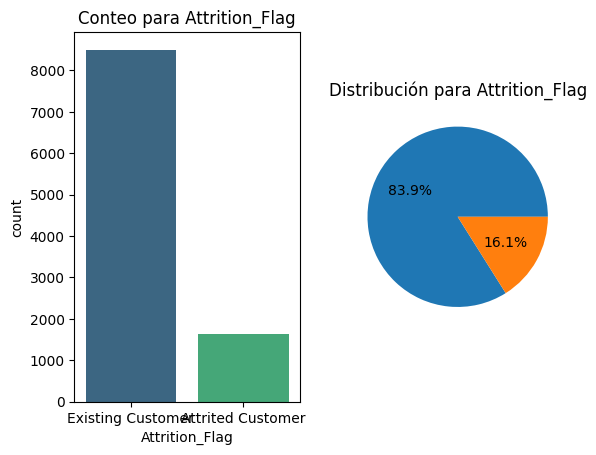

<Figure size 500x1000 with 0 Axes>

Gender
F    5358
M    4769
Name: count, dtype: int64 



C:\Users\cbarb\AppData\Local\Temp\ipykernel_8828\2304089446.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x =col, data=datos, palette='viridis', ax=ax[0])


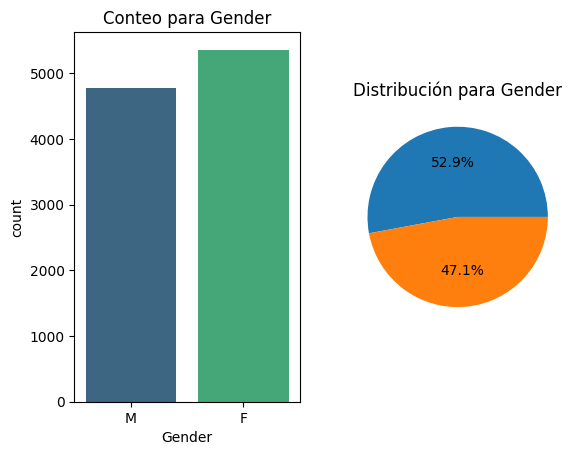

<Figure size 500x1000 with 0 Axes>

Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64 



C:\Users\cbarb\AppData\Local\Temp\ipykernel_8828\2304089446.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x =col, data=datos, palette='viridis', ax=ax[0])


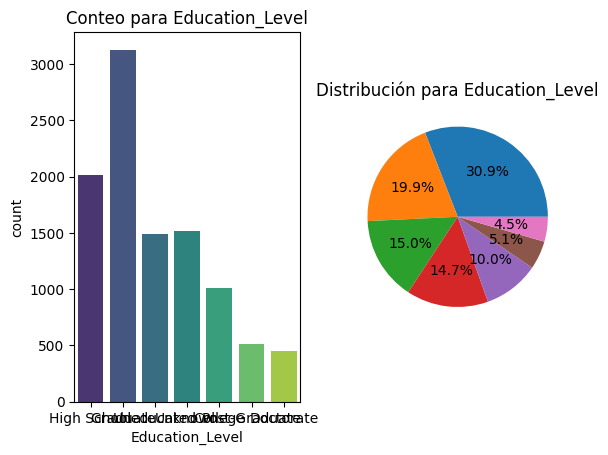

<Figure size 500x1000 with 0 Axes>

Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64 



C:\Users\cbarb\AppData\Local\Temp\ipykernel_8828\2304089446.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x =col, data=datos, palette='viridis', ax=ax[0])


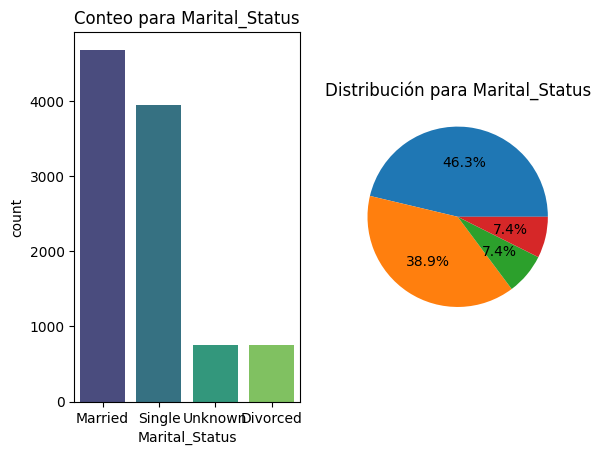

<Figure size 500x1000 with 0 Axes>

Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64 



C:\Users\cbarb\AppData\Local\Temp\ipykernel_8828\2304089446.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x =col, data=datos, palette='viridis', ax=ax[0])


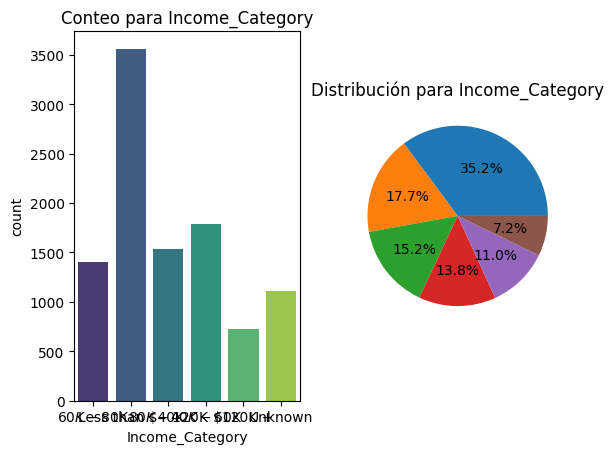

<Figure size 500x1000 with 0 Axes>

Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64 



C:\Users\cbarb\AppData\Local\Temp\ipykernel_8828\2304089446.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x =col, data=datos, palette='viridis', ax=ax[0])


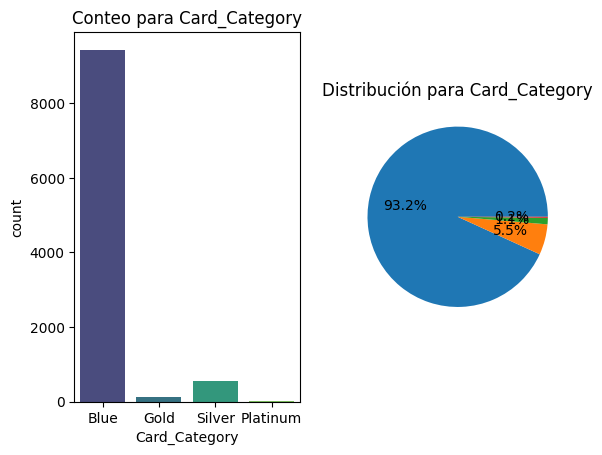

<Figure size 500x1000 with 0 Axes>

In [3]:
#Descripción de variables categóricas
for col in datos.columns:
    if datos[col].dtype == 'object':
        print(datos[col].value_counts() , "\n")

        fig, ax = plt.subplots(1,2)
        plt.figure(figsize=(5, 10)) 
        sns.countplot(x =col, data=datos, palette='viridis', ax=ax[0]) 
        ax[0].set_title(f'Conteo para {col}')

        ax[1].pie(datos[col].value_counts(),autopct='%1.1f%%')
        ax[1].set_title(f'Distribución para {col}')
        plt.show()  

        

In [4]:
pd.DataFrame(datos['Attrition_Flag'].value_counts() )

,count
Attrition_Flag,
Existing Customer,8500
Attrited Customer,1627


In [5]:
plt.figure(figsize=(5, 3)) 
sns.countplot(x =categoria, data=datos, palette='viridis') # Personalizar el gráfico plt.xlabel('Categoría') plt.ylabel('Conteo') plt.title('Conteo por Categoría') plt.show()
plt.title(f'Conteo para {categoria}')
plt.show()   
plt.bar()

NameError: name 'categoria' is not defined

<Figure size 500x300 with 0 Axes>